In [12]:
#載入所需函示庫

from matplotlib import pyplot as plt
%matplotlib inline
# 設定圖形大小; DPI越大圖越大
plt.rcParams["figure.dpi"] = 80

import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as smm
import statsmodels

### 任何檢定(含ANOVA、常態、equal var)都須包含
- H0H1：兩者都須清楚寫出，不只一個factor時，ANOVA的H0 不可以只寫all means equal，而要寫出是針對哪個factor
- 計算過程(本章則為ANOVA表)
- reject H0 or not? 判斷標準? (pvalue>0.05...等)
- conclusion

# Exercise 14.90  (16%)
- Hypothesis 2%  
- ANOVA Table 5%
- Interpretation 3%
- Check Condition: Normality assumption 3% 
- Check Condition: Equal variance assumption 3%

In [26]:
#讀取資料集
df_xr1490 = pd.read_excel('Xr14-90.xlsx')
print("Head of data")
display(df_xr1490.head())
print("Tail of data")
display(df_xr1490.tail())

Head of data


,Unnamed: 0,Diet 1,Diet 2,Diet 3,Diet 4
0,Block 1,5,2,6,8
1,Block 2,4,7,8,10
2,Block 3,6,12,9,2
3,Block 4,7,11,16,7
4,Block 5,9,8,15,14


Tail of data


,Unnamed: 0,Diet 1,Diet 2,Diet 3,Diet 4
0,Block 1,5,2,6,8
1,Block 2,4,7,8,10
2,Block 3,6,12,9,2
3,Block 4,7,11,16,7
4,Block 5,9,8,15,14


In [27]:
df_xr1490=df_xr1490.drop(["Unnamed: 0"], axis = 1)
df_xr1490=df_xr1490.rename(columns = {"Diet 1": "pounds_one", 
                                        "Diet 2": "pounds_two", 
                                        "Diet 3": "pounds_three", 
                                        "Diet 4": "pounds_four"})  
df_xr1490["id"] = df_xr1490.index
df_xr1490_2 = pd.wide_to_long(df_xr1490, ["pounds"], sep = "_", suffix = '\w+', i="id", j="factor").reset_index()
print("Head of data")
display(df_xr1490_2.head())
print("Tail of data")
display(df_xr1490_2.tail())

Head of data


,id,factor,pounds
0,0,one,5
1,1,one,4
2,2,one,6
3,3,one,7
4,4,one,9


Tail of data


,id,factor,pounds
15,0,four,8
16,1,four,10
17,2,four,2
18,3,four,7
19,4,four,14


### Hypothesis (2%)  
H0: µ1 = µ2 = µ3 = µ4  
H1: At least two means differ  
µi: the mean of diet i

### ANOVA table (5%) & Interpretation (3%)

In [6]:
results = smf.ols('pounds ~ C(factor) + C(id)', data=df_xr1490_2).fit()
aov_table = sms.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(factor),53.8,3.0,1.652842,0.229629
C(id),102.2,4.0,2.354839,0.112507
Residual,130.2,12.0,NaN,NaN


p-value=0.2296 (>0.01).  
Cannot reject H0.  
There is not enough evidence to conclude there are differences between the four diets.

### Check Condition: Normality assumption (3%)  
H0: The distribution is normal.  
H1: The distribution is not normal.  

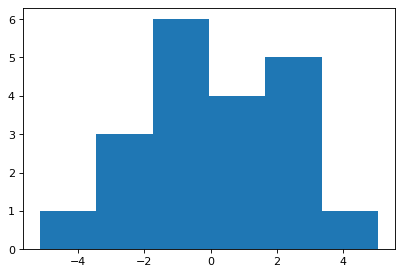

In [13]:
_ = plt.hist(results.resid, bins = 'auto')

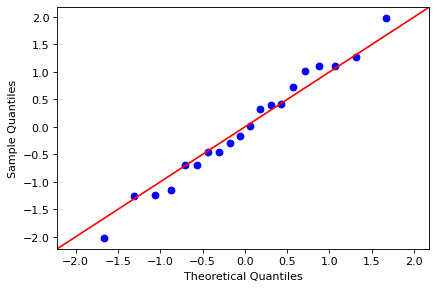

In [14]:
fig = sm.qqplot(results.resid, stats.norm, fit=True, line='45')

In [15]:
stat, p = stats.shapiro(results.resid)
print('Statistics=%.4f, p=%.4f' % (stat, p))

Statistics=0.9826, p=0.9630


Based on histogram, Q-Q Plot and the p-value of Shapiro-Wilk test (0.9630)>0.01, we cannot reject H0.  
So, we conclude that the normality assumption is not violated.

### Check Condition: Equal variance assumption (3%)  
H0: Variance of different treatment groups are equal.  
H1: At least two treatment groups have different variance.

In [16]:
df_xr1490_2['resid'] = results.resid

stats.bartlett(df_xr1490_2['resid'][df_xr1490_2['factor'] == 'one'], 
               df_xr1490_2['resid'][df_xr1490_2['factor'] == 'two'],
               df_xr1490_2['resid'][df_xr1490_2['factor'] == 'three'],
               df_xr1490_2['resid'][df_xr1490_2['factor'] == 'four'])

BartlettResult(statistic=4.290136711862412, pvalue=0.23179100656950255)

The p-value of Bartlett's Test is 0.2318 > 0.01. As a result, we cannot reject H0.  
The result suggest that equal variance assumption is not violated.

# Exercise 14.96 (21%)  
- Hypothesis (a) 2%  
- Hypothesis (b) 2%  
- ANOVA Table 5%
- Interpretation (a) 3%
- Interpretation (b) 3%
- Check Condition: Normality assumption 3%
- Check Condition: Equal variance assumption 3%

In [37]:
#讀取資料集
df_xr1496 = pd.read_excel('Xr14-96.xlsx')
print("Head of data")
display(df_xr1496.head())
print("Tail of data")
display(df_xr1496.tail())

Head of data


,Age,General,Internal,Surgery,Pediatrics,Obs/Gyn
0,30,54.0,56.7,55.7,58.3,60.6
1,31,54.9,61.8,61.5,50.7,65.2
2,32,55.5,46.6,59.5,56.4,63.2
3,33,37.0,44.6,40.8,51.4,37.3
4,34,52.0,63.8,44.9,52.5,56.6


Tail of data


,Age,General,Internal,Surgery,Pediatrics,Obs/Gyn
31,61,61.3,56.9,70.2,58.0,68.0
32,62,58.7,62.0,65.2,59.3,74.2
33,63,47.7,37.6,44.9,47.3,57.9
34,64,53.5,47.1,61.7,53.5,55.0
35,65,56.2,57.0,58.1,54.1,66.0


In [38]:
df_xr1496=df_xr1496.drop(["Age"], axis = 1)
df_xr1496=df_xr1496.rename(columns = {"General": "specialties_General", 
                                        "Internal ": "specialties_Internal",  
                                        "Surgery": "specialties_Surgery",
                                        "Pediatrics": "specialties_Pediatrics",
                                        "Obs/Gyn": "specialties_ObsGyn",})  
df_xr1496["id"] = df_xr1496.index

df_xr1496_2 = pd.wide_to_long(df_xr1496, ["specialties"], sep = "_", suffix = '\w+', i="id", j="factor").reset_index()
print("Head of data")
display(df_xr1496_2.head())
print("Tail of data")
display(df_xr1496_2.tail())

Head of data


,id,factor,specialties
0,0,General,54.0
1,1,General,54.9
2,2,General,55.5
3,3,General,37.0
4,4,General,52.0


Tail of data


,id,factor,specialties
175,31,ObsGyn,68.0
176,32,ObsGyn,74.2
177,33,ObsGyn,57.9
178,34,ObsGyn,55.0
179,35,ObsGyn,66.0


### ANOVA table (5%)

In [39]:
results = smf.ols('specialties ~ C(factor) + C(id)', data=df_xr1496_2).fit()
aov_table = sms.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(factor),1406.390222,4.0,10.715019,1.322412e-07
C(id),7309.684000,35.0,6.364696,9.352614e-16
Residual,4593.893778,140.0,NaN,NaN


### a. (hypothesis 2%, interpretation 3%)
H0: µ_General = µ_Internal = µ_Surgery = µ_Pediatrics = µ_Obs/Gyn   
H1: At least two means differ   
Since p-value = 0. < 0.05, we reject H0.  
There is enough evidence to infer differences between medical specialties.

### b. (hypothesis 2%, interpretation 3%)
H0: µ30 = µ31 = ... = µ65   
H1: At least two means differ   
µi: the mean of age = i  
Since p-value = 0. < 0.05, we reject H0.  
There is sufficient evidence to indicate that there are differences between the physicians’ ages, which tells us that this experimental design is recommended.

### Check Condition: Normality assumption (3%)  
H0: The distribution is normal.  
H1: The distribution is not normal.  

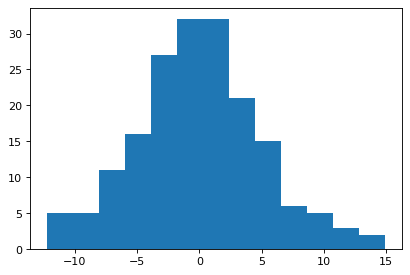

In [40]:
_ = plt.hist(results.resid, bins = 'auto')

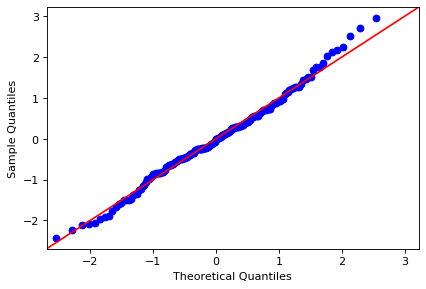

In [41]:
fig = sm.qqplot(results.resid, stats.norm, fit=True, line='45')

In [42]:
stat, p = stats.shapiro(results.resid)
print('Statistics=%.4f, p=%.4f' % (stat, p))

Statistics=0.9917, p=0.3865


Based on histogram, Q-Q Plot and the p-value of Shapiro-Wilk test (0.3865)>0.05, we cannot reject H0.  
So, we conclude that the normality assumption is not violated.

### Check Condition: Equal variance assumption (3%)  
H0: Variance of different treatment groups are equal.  
H1: At least two treatment groups have different variance.

In [46]:
df_xr1496_2['resid'] = results.resid

stats.bartlett(df_xr1496_2['resid'][df_xr1496_2['factor'] == 'General'], 
               df_xr1496_2['resid'][df_xr1496_2['factor'] == 'Internal'],
               df_xr1496_2['resid'][df_xr1496_2['factor'] == 'Surgery'],
               df_xr1496_2['resid'][df_xr1496_2['factor'] == 'Pediatrics'],
               df_xr1496_2['resid'][df_xr1496_2['factor'] == 'ObsGyn'])

BartlettResult(statistic=27.22976687785466, pvalue=1.7861856941412227e-05)

The p-value of Bartlett's Test is 0 < 0.05. As a result, we reject H0.  
The result suggest that equal variance assumption is violated.  
Thus, there are few points of concern regarding to the result of ANOVA.

# Exercise 14.106 (31%)
- (a) 1%
- (b) 1%
- (c) 2%
- ANOVA Table 5%
- (d) Hypothesis 2%, Interpretation 3%
- (e) Hypothesis 2%, Interpretation 3%
- (f) Hypothesis 2%, Interpretation 3%  
- Check Condition: Normality assumption 3%
- Check Condition: Equal variance assumption 3%
- Check Condition: Independence 1%

In [60]:
#讀取資料集
df_xr14106 = pd.read_excel('Xr14-106.xlsx')
df_xr14106=df_xr14106.rename(columns = {"Group": "income", 
                                        "Form 1": "time_form1",  
                                        "Form 2": "time_form2",  
                                        "Form 3": "time_form3",  
                                        "Form 4": "time_form4"})  
df_xr14106["id"] = df_xr14106.index
df_xr14106_2 = pd.wide_to_long(df_xr14106, ["time"], sep = "_", suffix = '\w+', i="id", j="form").reset_index()
df_xr14106_2

/Users/wuyunwei/opt/anaconda3/lib/python3.8/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,id,form,income,time
0,0,form1,1,43
1,1,form1,1,57
2,2,form1,1,53
3,3,form1,1,58
4,4,form1,1,72
...,...,...,...,...
115,25,form4,3,158
116,26,form4,3,92
117,27,form4,3,38
118,28,form4,3,158


### a. (1%)  
There are 12 treatments.  
### b. (1%)  
There are two factors:  
Factor A: tax form  
Factor B: Income bracket  
### c. (2%)  
Tax form: 4 levels  
Income bracket: 3 levels   

### ANOVA table (5%)

In [61]:
results = smf.ols('time ~ C(form) + C(income) + C(form):C(income)', data=df_xr14106_2).fit()

aov_table = sms.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(form),6279.866667,3.0,2.562717,0.058572
C(income),6718.716667,2.0,4.112707,0.018994
C(form):C(income),5101.883333,6.0,1.041000,0.402973
Residual,88217.000000,108.0,NaN,NaN


### d. Hypothesis (2%) & Interpretation (3%)  
H0: Factor A and B do not interact to affect the mean response.  
H1: Factor A and B interact to affect the mean response.  
p-value=0.4030 (>0.05)  
Cannot reject H0  
There is not enough evidence to conclude that forms and income groups interact  
### e. Hypothesis (2%) & Interpretation (3%)  
H0: The means of different forms (form1 ~ form4) are all the same.  
H1: At least two means differ  
p-value=0.0586. (>0.05)  
Cannot reject H0  
There is not enough evidence to conclude that differences exist between the four forms.  
### f. Hypothesis (2%) & Interpretation (3%)  
H0: The means of different income brackets (lowest, middle, highest) are all the same.  
H1: At least two means differ  
p-value=0.0190. (<0.05)  
Reject H0  
There is enough evidence to conclude that differences exist between the different income brackets.  

### Check Condition: Normality assumption (3%)  
H0: The distribution is normal.  
H1: The distribution is not normal.  

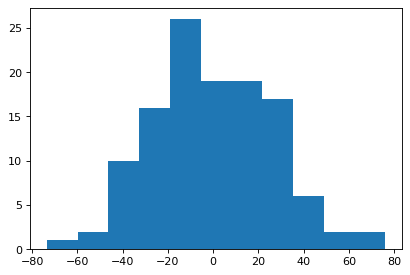

In [62]:
_ = plt.hist(results.resid, bins = 'auto')

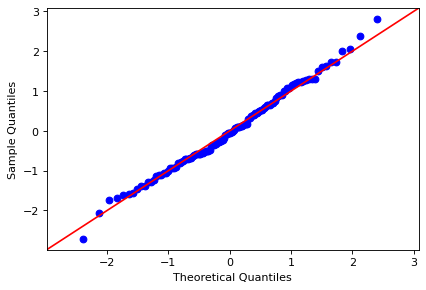

In [63]:
fig = sm.qqplot(results.resid, stats.norm, fit=True, line='45')

In [64]:
stat, p = stats.shapiro(results.resid)
print('Statistics=%.4f, p=%.4f' % (stat, p))

Statistics=0.9941, p=0.8968


Based on histogram, Q-Q Plot and the p-value of Shapiro-Wilk test (0.8968)>0.05, we cannot reject H0.  
So, we conclude that the normality assumption is not violated.

### Check Condition: Equal variance assumption (3%)  
H0: Variance of different treatment groups are equal.  
H1: At least two treatment groups have different variance.

In [66]:
df_xr14106_2['resid'] = results.resid

df_xr14106_2['form_income'] = df_xr14106_2['form'] + "_" + df_xr14106_2['income'].apply(str) 
all_level = df_xr14106_2['form_income'].unique()
print("List of all levels: \n", all_level)

data_list = []
for alevel in all_level:
    data_list.append(df_xr14106_2['resid'][df_xr14106_2['form_income'] == alevel])
    
#Conduct Bartlett's Test
stats.bartlett(*data_list)

List of all levels: 
 ['form1_1' 'form1_2' 'form1_3' 'form2_1' 'form2_2' 'form2_3' 'form3_1'
 'form3_2' 'form3_3' 'form4_1' 'form4_2' 'form4_3']


BartlettResult(statistic=6.33671175693431, pvalue=0.8499800287699081)

The p-value of Bartlett's Test is 0.85 >0.05. As a result, we cannot reject H0.  
The result suggest that equal variance assumption is not violated.
### Check Condition: Independence (1%)  
Since the patients are randomly chosen, the samples are independent.st is 0.8500, which is not significant. As a result, we cannot reject H0.  
The result suggest that equal variance assumption is not violated.

# Exercise 14.108 (31%) 
- (a) 1%  
- (b) 1%  
- (c) 2%  
- ANOVA Table 5%
- (d-schedule) Hypothesis 2%, Interpretation 3%
- (d-drug) Hypothesis 2%, Interpretation 3%
- (d-interaction) Hypothesis 2%, Interpretation 3%  
- Check Condition: Normality assumption 3%
- Check Condition: Equal variance assumption 3% 
- Check Condition: Independence 1%

In [23]:
#讀取資料集
df_xr14108 = pd.read_excel('Xr14-108.xlsx')
df_xr14108

/Users/wuyunwei/opt/anaconda3/lib/python3.8/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,Schedule,Drug 1,Drug 2,Drug 3,Drug 4
0,Week,17,24,14,10
1,Week,6,15,9,-1
2,Week,10,10,12,0
3,Week,12,16,0,3
4,Week,14,14,6,-1
5,Two Days,18,-2,20,-2
6,Two Days,9,0,16,7
7,Two Days,17,17,12,10
8,Two Days,21,2,17,6
9,Two Days,15,6,18,7


### a. (1%)  
There are two factors:  
Factor A: drug mixture  
Factor B: schedule  
### b. (1%)  
The response variable is the improvement index.  
### c. (2%)  
There are a = 4 drug mixtures and b = 2 schedules.  

In [47]:
df_xr14108=df_xr14108.rename(columns = {"Drug 1": "index_drug1",  
                                        "Drug 2": "index_drug2",  
                                        "Drug 3": "index_drug3",  
                                        "Drug 4": "index_drug4"})  
df_xr14108["id"] = df_xr14108.index
df_xr14108_2 = pd.wide_to_long(df_xr14108, ["index"], sep = "_", suffix = '\w+', i="id", j="Drug").reset_index()
print("Head of data")
display(df_xr14108_2.head())
print("Tail of data")
display(df_xr14108_2.tail())

Head of data


,id,Drug,Schedule,index
0,0,drug1,Week,17
1,1,drug1,Week,6
2,2,drug1,Week,10
3,3,drug1,Week,12
4,4,drug1,Week,14


Tail of data


,id,Drug,Schedule,index
35,5,drug4,Two Days,-2
36,6,drug4,Two Days,7
37,7,drug4,Two Days,10
38,8,drug4,Two Days,6
39,9,drug4,Two Days,7


### ANOVA table (5%)

In [48]:
results = smf.ols('index ~ C(Drug) + C(Schedule) + C(Drug):C(Schedule)', data=df_xr14108_2).fit()

aov_table = sms.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Drug),581.8,3.0,7.711067,0.000516
C(Schedule),14.4,1.0,0.572565,0.454777
C(Drug):C(Schedule),548.6,3.0,7.271040,0.000749
Residual,804.8,32.0,NaN,NaN


### d. (schedule) Hypothesis (2%) & Interpretation (3%)   
H0: The means of different schedules (Two days and Week) are all the same.  
H1: At least two means differ  
p-value=0.4548. (>0.05)  
Cannot reject H0  
There is not enough evidence to conclude that differences exist between the two schedules.  
### d. (drug) Hypothesis (2%) & Interpretation (3%)  
H0: The means of different drug mixtures (drug mixture 1 ~ drug mixture 4) are all the same.  
H1: At least two means differ  
p-value=0.0005. (<0.05)    
Reject H0  
There is enough evidence to conclude that differences exist between the different drug mixtures.  
### d. (interaction) Hypothesis (2%) & Interpretation (3%)
H0: Factor A and B do not interact to affect the mean response.  
H1: Factor A and B interact to affect the mean response.  
p-value=0.0007 (<0.05)  
Reject H0  
There is enough evidence to conclude that schedules and drug mixtures interact.
Because there is evidence of iteraction, the tests of the factors are irrelevant.  
There may or not be differences between the levels of factor A and of the levels of factor B.   
(本次作業中，如果有特別強調這點，則兩個因子的假設檢定可以忽略不寫；但若沒提到這點就直接忽略，另外兩個假設檢定的分數就會被扣掉)

### Check Condition: Normality assumption (3%)  
H0: The distribution is normal.  
H1: The distribution is not normal.  

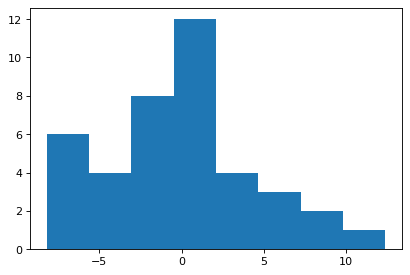

In [49]:
_ = plt.hist(results.resid, bins = 'auto')

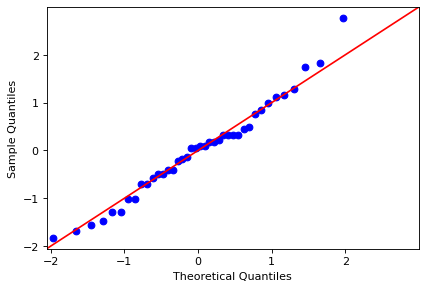

In [50]:
fig = sm.qqplot(results.resid, stats.norm, fit=True, line='45')

In [51]:
stat, p = stats.shapiro(results.resid)
print('Statistics=%.4f, p=%.4f' % (stat, p))

Statistics=0.9786, p=0.6375


Based on histogram, Q-Q Plot and the p-value of Shapiro-Wilk test (0.6375)>0.05, we cannot reject H0.  
So, we conclude that the normality assumption is not violated.

### Check Condition: Equal variance assumption (3%)  
H0: Variance of different treatment groups are equal.  
H1: At least two treatment groups have different variance.

In [57]:
df_xr14108_2['resid'] = results.resid

df_xr14108_2['drug_schedule'] = df_xr14108_2['Drug'] + "_" + df_xr14108_2['Schedule'].apply(str) 
all_level = df_xr14108_2['drug_schedule'].unique()
print("List of all levels: \n", all_level)

data_list = []
for alevel in all_level:
    data_list.append(df_xr14108_2['resid'][df_xr14108_2['drug_schedule'] == alevel])
    
#Conduct Bartlett's Test
stats.bartlett(*data_list)

List of all levels: 
 ['drug1_Week' 'drug1_Two Days' 'drug2_Week' 'drug2_Two Days' 'drug3_Week'
 'drug3_Two Days' 'drug4_Week' 'drug4_Two Days']


BartlettResult(statistic=3.592773434657972, pvalue=0.8253035753523124)

The p-value of Bartlett's Test is 0.8253 >0.05, which is not significant. As a result, we cannot reject H0.  
The result suggest that equal variance assumption is not violated.

### Check Condition: Independence (1%)  
Since the patients are randomly chosen, the samples are independent.
